<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXAM/blob/main/midtermexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm

## Training Data

In [61]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


# Create plots to see correlation of features


Found that all independent variables contain little correlation to flood probability

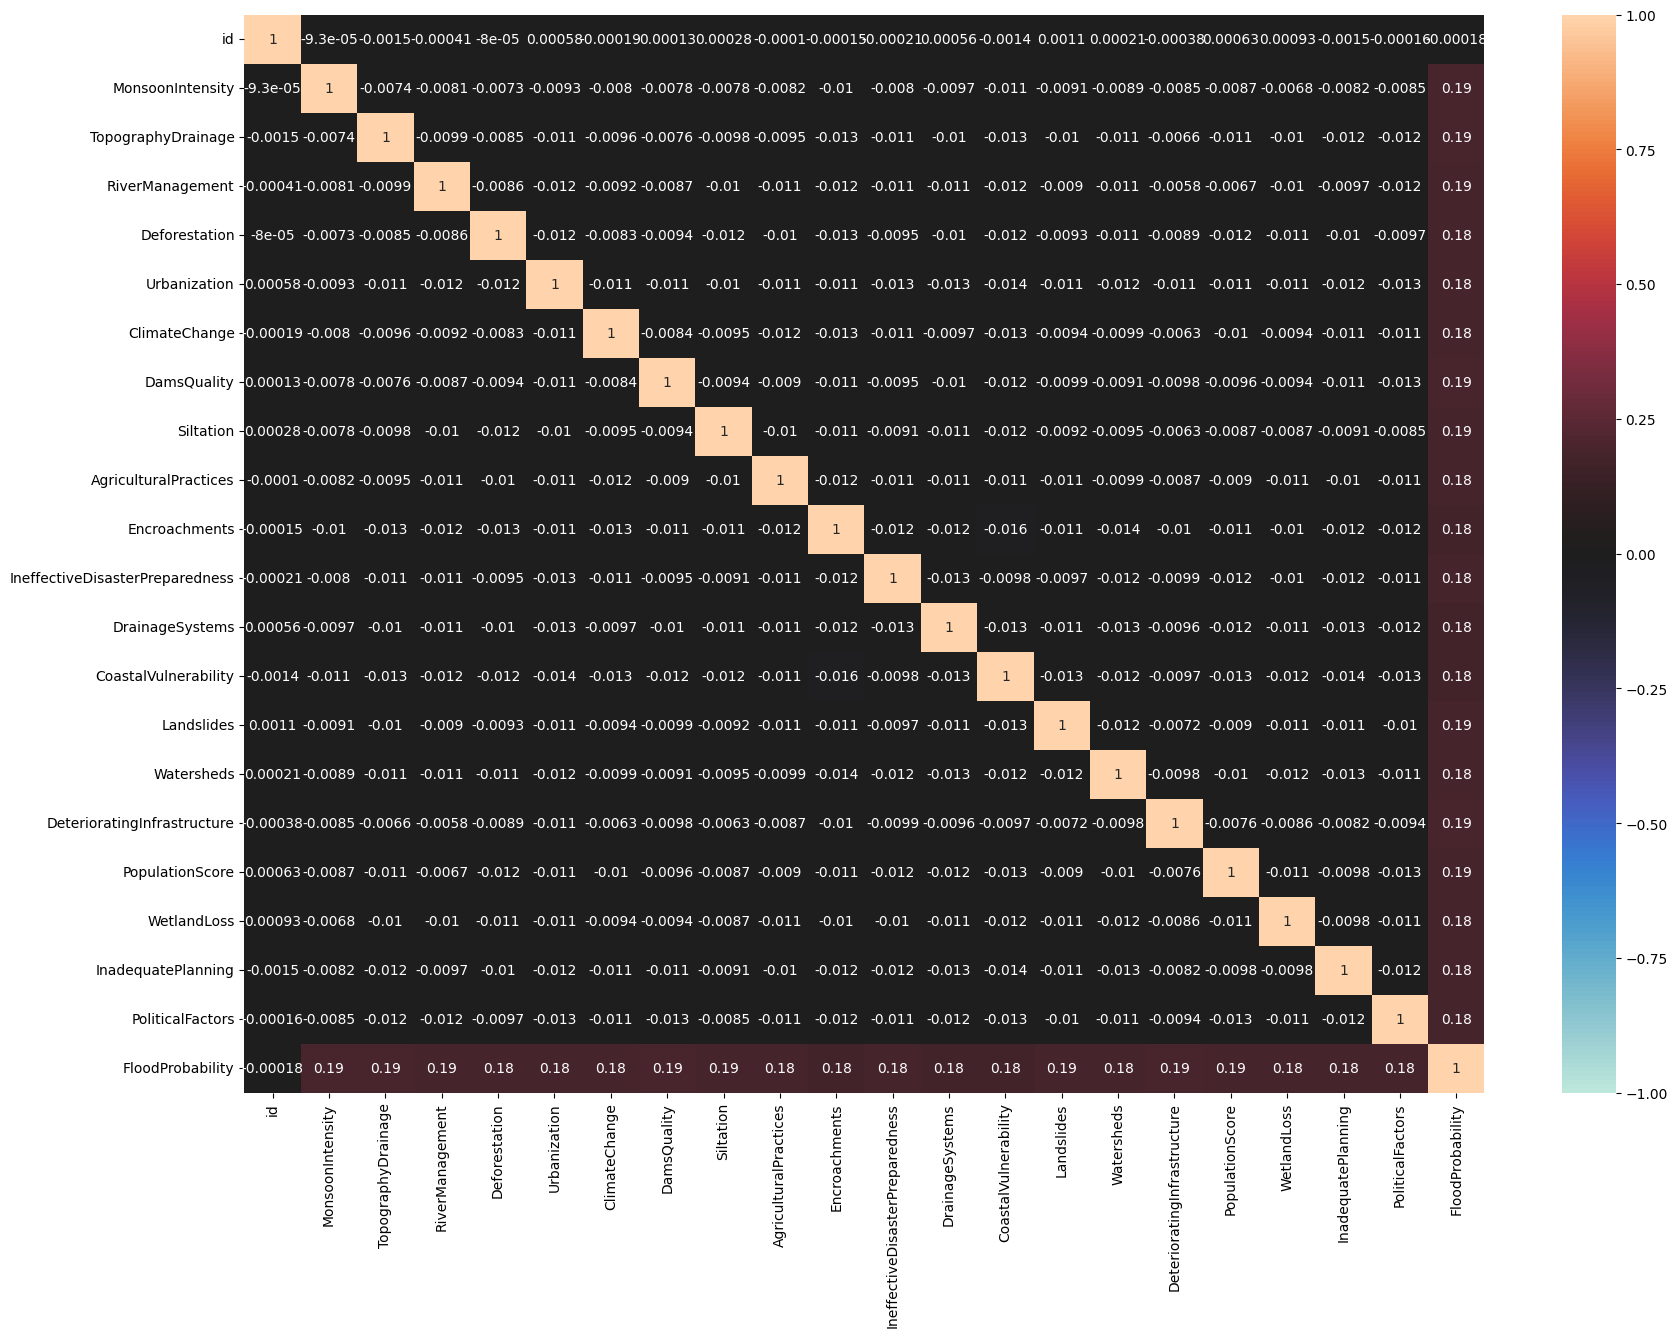

In [62]:
correlation = traindata.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()


# Scatter Plot

Found no correlation in scatter plot ignoring scatter plot

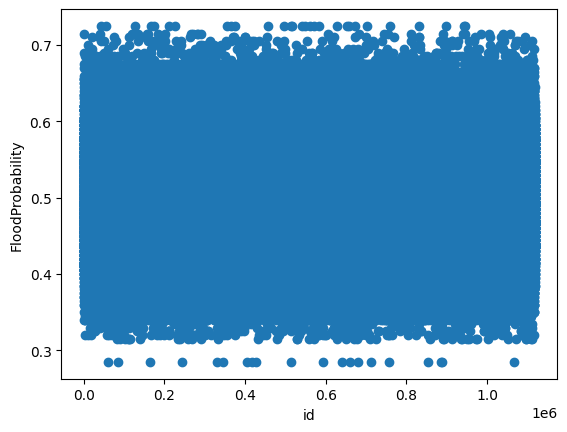

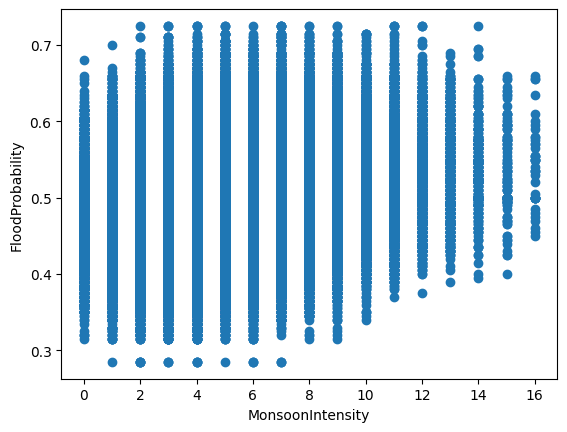

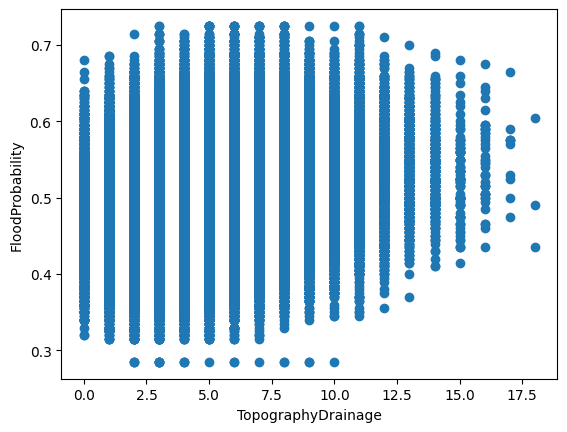

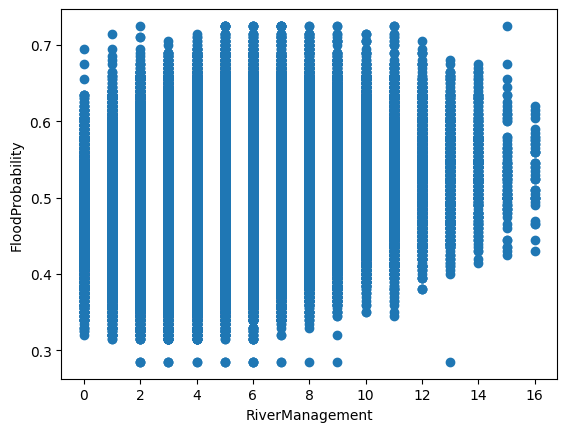

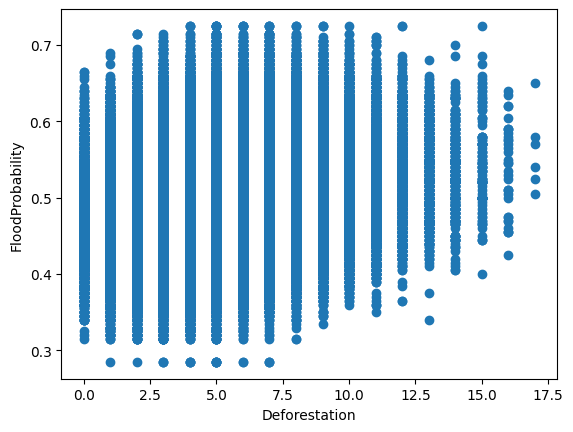

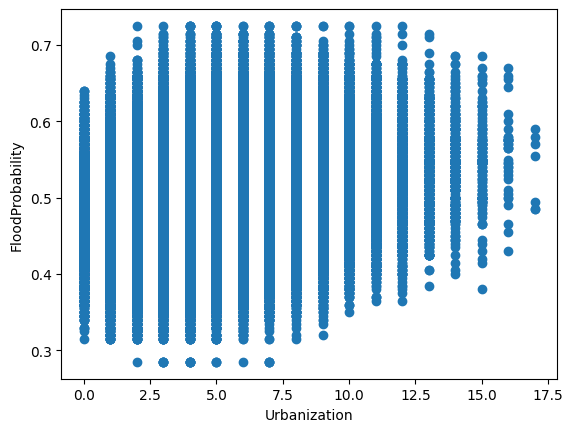

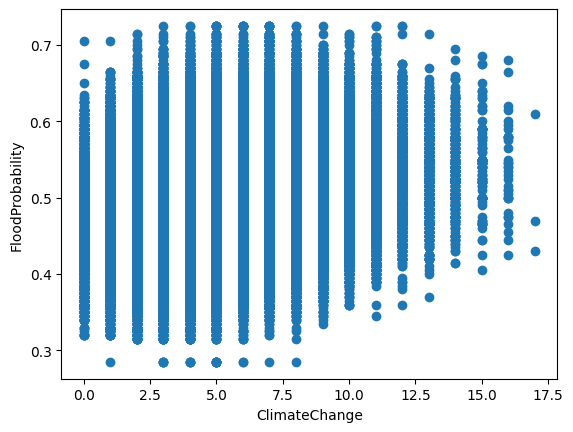

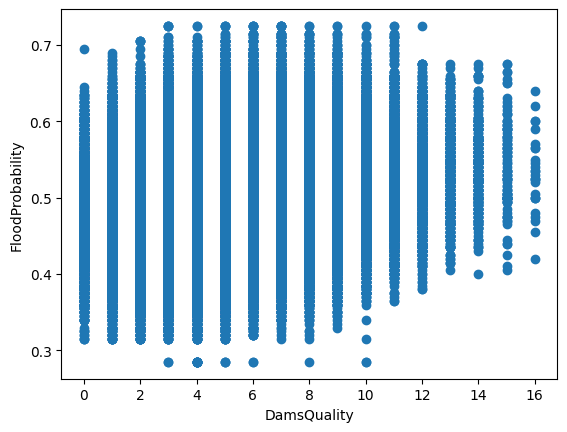

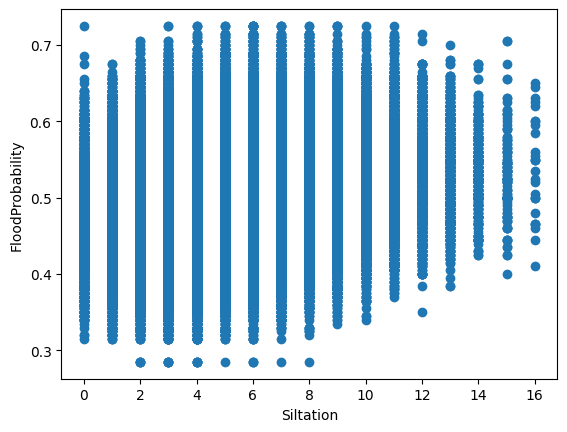

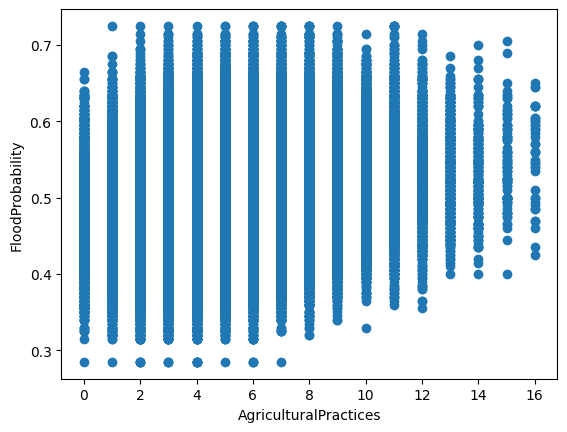

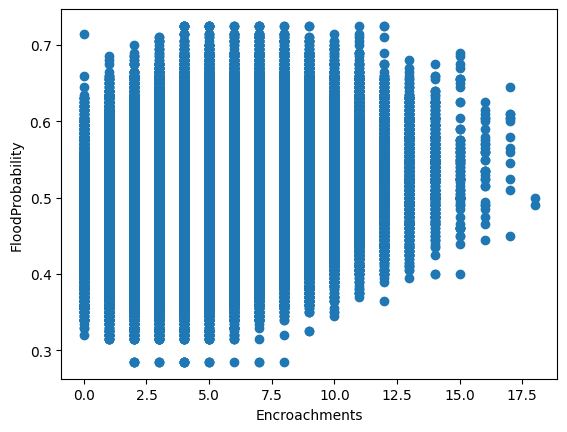

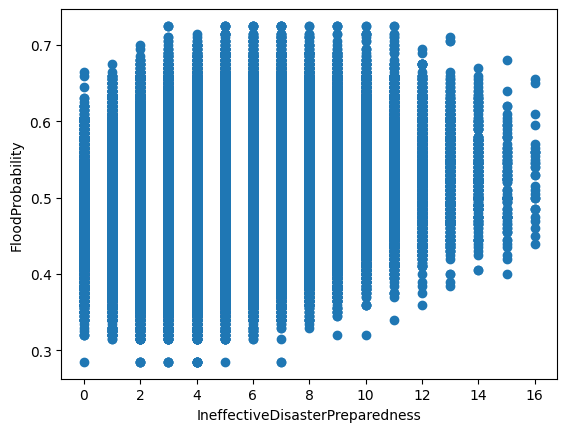

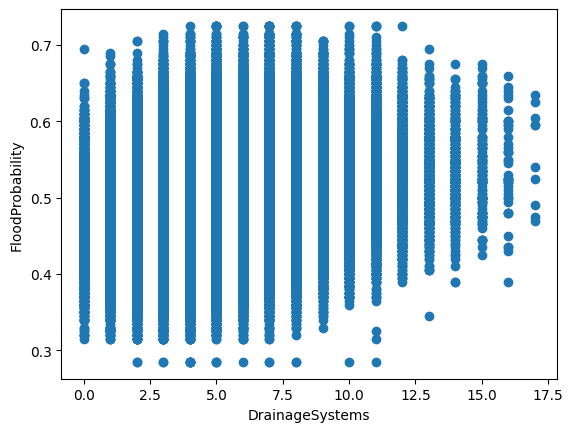

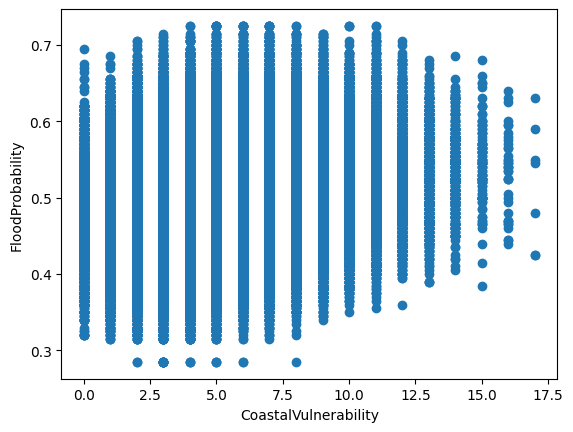

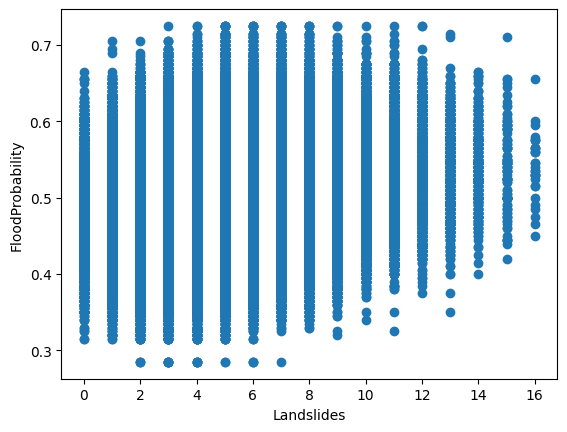

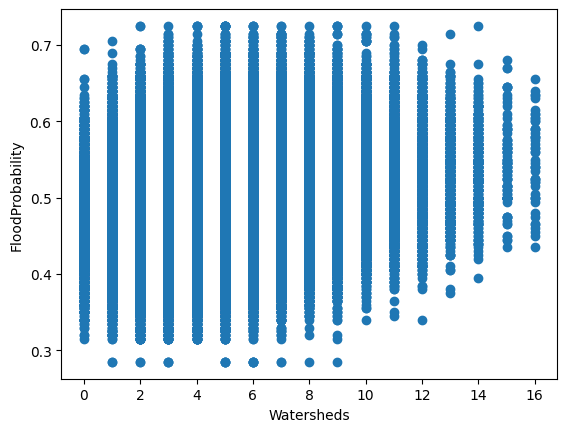

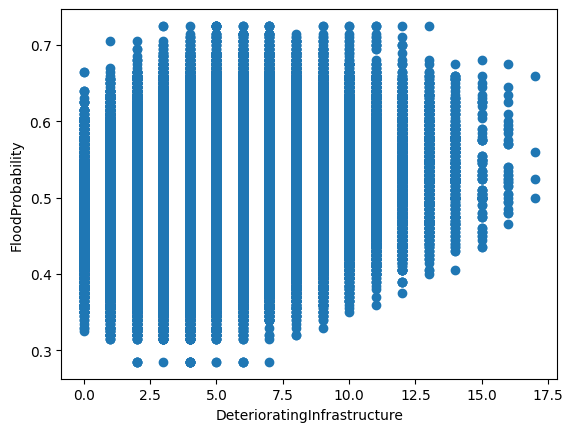

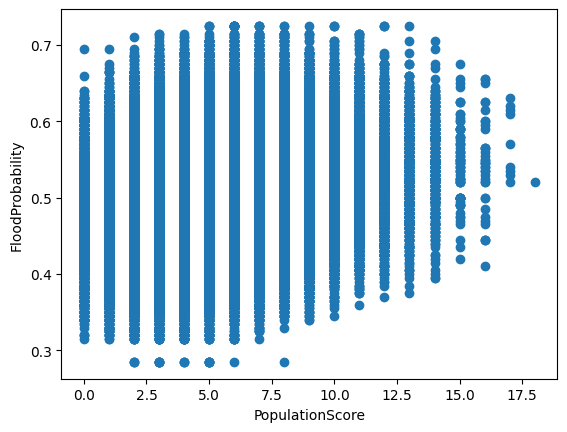

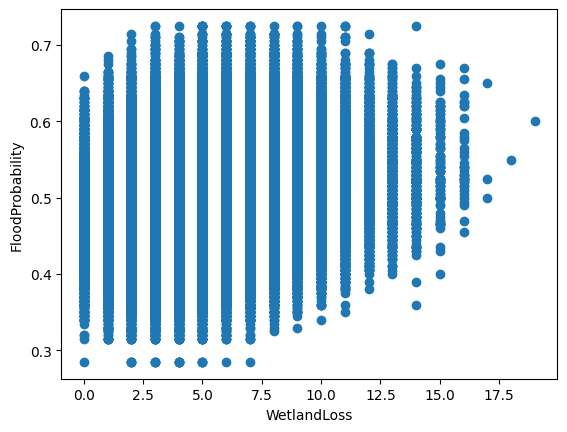

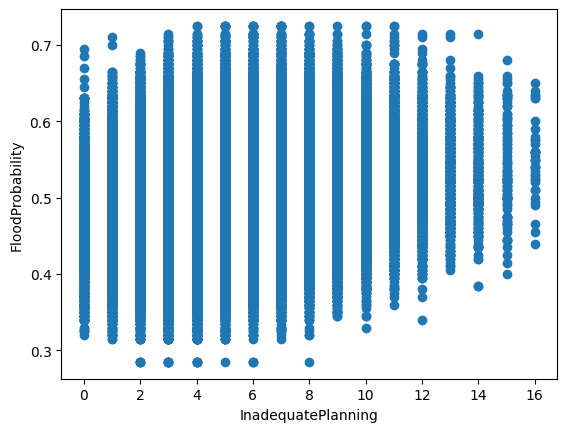

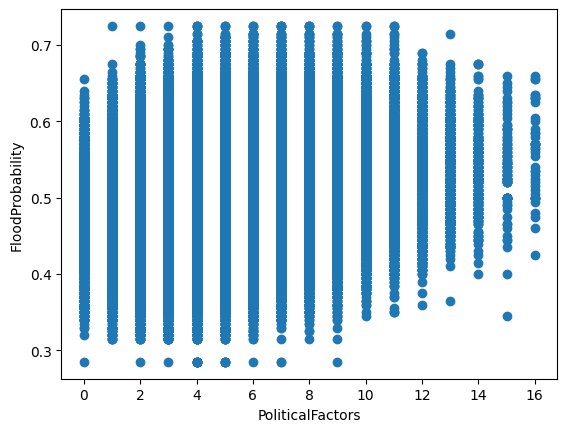

In [63]:
features = traindata.drop("FloodProbability", axis=1)
features.head()
for feature_name in features.keys():
    plt.scatter(traindata[feature_name],
            traindata["FloodProbability"])

    plt.xlabel(feature_name)
    plt.ylabel("FloodProbability")
    plt.show()

# Training

# All Features



In [109]:
X = traindata.drop(["FloodProbability", "id"], axis=1)
X = sm.add_constant(X)
y = traindata['FloodProbability']
mlr_model = LinearRegression()
mlr_model.fit(X, y)
all_features_model = sm.OLS(y, X).fit()
all_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:12:34   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0533      0.000   -234.995      0.000      -0.054      -0.053
MonsoonIntensity                    0.0056   9.25e-06    606.734      0.000       0.006       0.006
TopographyDrainage                  0.0056   9.09e-06    621.525      0.000       0.006       0.006
RiverManagement                     0.0057   9.18e-06    617.178      0.000       0.006       0.006
Deforestation                       0.0057   9.27e-06    612.404      0.000       0.006       0.006
Urbanization                        0.0057   9.14e-06    619.319      0.000       0.006       0.006
ClimateChange                       0.0057   9.25e-06    612.437      0.000       0.006       0.006
DamsQuality                         0.0057   9.13e-06    619.170      0.000       0.006       0.006
Siltation                           0.0056   9.21e-06    612.284      0.000       0.006       0.006
AgriculturalPractices               0.0056    9.2e-06    612.643      0.000       0.006       0.006
Encroachments                       0.0056   9.14e-06    618.374      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   9.16e-06    615.995      0.000       0.006       0.006
DrainageSystems                     0.0056   9.18e-06    613.641      0.000       0.006       0.006
CoastalVulnerability                0.0057   9.11e-06    622.228      0.000       0.006       0.006
Landslides                          0.0056   9.15e-06    616.245      0.000       0.006       0.006
Watersheds                          0.0056   9.14e-06    617.853      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   9.21e-06    609.647      0.000       0.006       0.006
PopulationScore                     0.0057   9.17e-06    618.914      0.000       0.006       0.006
WetlandLoss                         0.0056    9.2e-06    612.654      0.000       0.006       0.006
InadequatePlanning                  0.0056   9.14e-06    613.363      0.000       0.006       0.006
PoliticalFactors                    0.0056    9.1e-06    620.512      0.000       0.006       0.006
==============================================================================
Omnibus:                   100155.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148528.907
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residual Graph


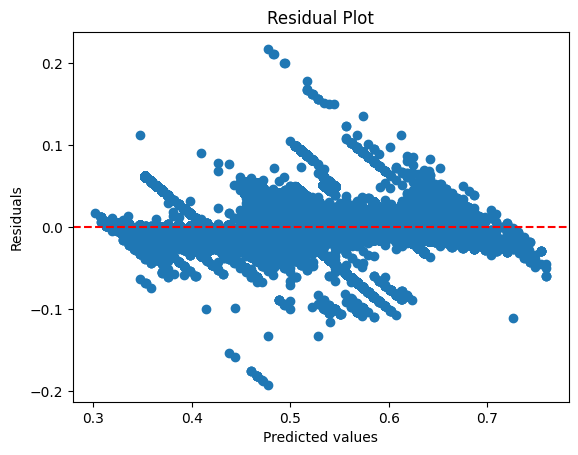

In [110]:

y_pred = all_features_model.fittedvalues
residuals = y - y_pred

# Plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Fitted vs Actual


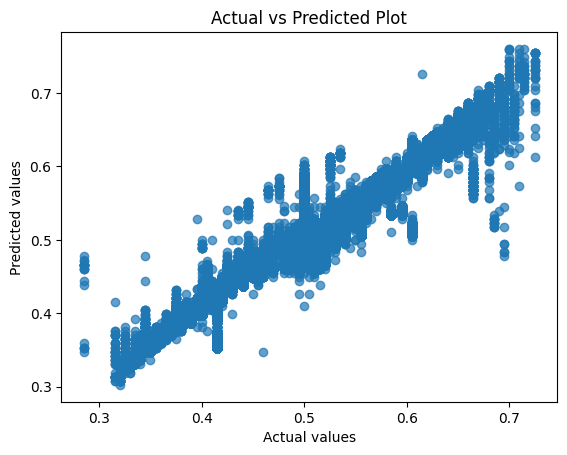

In [111]:
import matplotlib.pyplot as plt

y_pred = all_features_model.fittedvalues
y_actual = y

# Plot
plt.scatter(y_actual, y_pred, alpha=0.7)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Plot")
plt.show()


# Upper bound features

Features that only have <= 0.19 correlation based on heatmap


It seems like reducing the number of features reduces R-squared. I will try to see if there is correlation with the number of feautures




In [101]:
X = traindata[["MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Siltation", "Landslides", "DeterioratingInfrastructure", "PopulationScore", "WetlandLoss"]]
X = sm.add_constant(X)
y = traindata['FloodProbability']
mlr_model = LinearRegression()
mlr_model.fit(X, y)
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                 5.921e+04
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:02:41   Log-Likelihood:             1.9375e+06
No. Observations:             1117957   AIC:                        -3.875e+06
Df Residuals:                 1117948   BIC:                        -3.875e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3110      0.000   1095.192      0.000       0.310       0.312
MonsoonIntensity                0.0050   1.97e-05    252.645      0.000       0.005       0.005
TopographyDrainage              0.0049   1.93e-05    252.942      0.000       0.005       0.005
RiverManagement                 0.0049   1.95e-05    250.990      0.000       0.005       0.005
Siltation                       0.0049   1.96e-05    250.798      0.000       0.005       0.005
Landslides                      0.0049   1.95e-05    250.056      0.000       0.005       0.005
DeterioratingInfrastructure     0.0049   1.96e-05    252.375      0.000       0.005       0.005
PopulationScore                 0.0049   1.95e-05    250.176      0.000       0.005       0.005
WetlandLoss                     0.0049   1.96e-05    248.074      0.000       0.005       0.005
==============================================================================
Omnibus:                     1547.373   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1299.553
Skew:                           0.008   Prob(JB):                    6.39e-283
Kurtosis:                       2.834   Cond. No.                         99.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residual Data

Using a subset of all features result in noisy residual plot

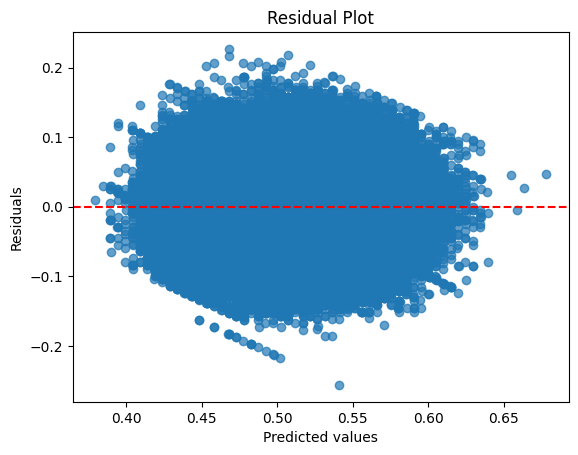

In [102]:

y_pred = olsmod.fittedvalues
residuals = y - y_pred

# Plot
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Fitted vs Actual

We can see a trend here but nevertheless its much more noisier than the all feauture



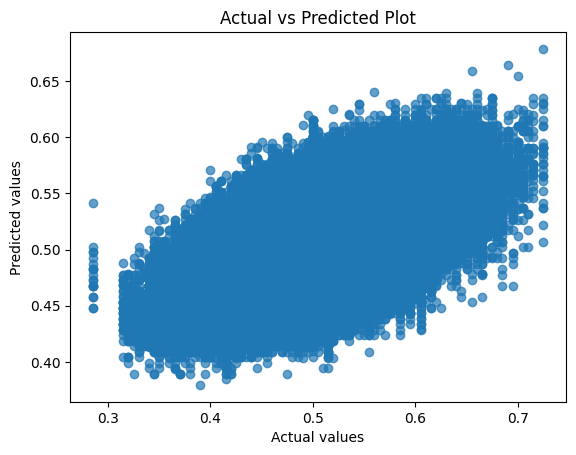

In [106]:
import matplotlib.pyplot as plt

y_pred = olsmod.fittedvalues
y_actual = y

# Plot
plt.scatter(y_actual, y_pred, alpha=0.7)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Plot")
plt.show()


# Proof of increasing R-squared based on number of features


Due to time constraints I was only able to get the data from up to 3 features only but here shows that more features mean higher R-Squared

In [113]:
import math
import itertools

results = []

for r in range(1, len(features) + 1):
    print(f"testing all combinations for {r} feautues")
    max_r2 = 0
    sum = 0
    qty = 0
    for combo in itertools.combinations(features, r):
        X = traindata[list(combo)]
        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()
        r2 = model.rsquared

        max_r2 = r2 if r2 > max_r2 else max_r2
        sum += r2
        qty += 1

        results.append((combo, r2))

    average = sum / qty
    print(f"max: {max_r2}" )
    print(f"min: {min_r2}" )
    print(f"ave: {average}" )


results.sort(key=lambda x: x[1], reverse=True)

for combo, r2 in results[:10]:
    print(f"Features: {combo}, R² = {r2:.4f}")


testing all combinations for 1 feautues
max: 0.03610264422901488
min: 0.03160373704947517
ave: 0.03226521208580356
testing all combinations for 2 feautues
max: 0.07247586666619454
min: 0.03160373704947517
ave: 0.06517489255093967
testing all combinations for 3 feautues
max: 0.10910228756765461
min: 0.03160373704947517
ave: 0.09874873820410135
testing all combinations for 4 feautues


KeyboardInterrupt: 

# Findings

It turns out that the number of features used is correlated to R-Squared so the more features you used you will get better R-Squared

This is because each feature having small amount of correlaton to Flood Probability helps each other to form the best model


Therefore using all the features result in the best model

## Test File

In [99]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

## Sample Submission File

In [112]:


sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'

samplefile = pd.read_csv(sample_submission_url)

id = samplefile.pop('id')
y_pred = all_features_model.predict(testdata)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")



Submission file created: submission_file.csv
